<a href="https://colab.research.google.com/github/EmamulHossen/FeatureTransformation-Assignment-/blob/main/Feature_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


# **Import Required Library**

In [3]:
import pandas as pd

# **Load the Dataset**

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Data/supershops.csv")

In [5]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


# **Spliting the feature & Label Column**

In [6]:
x=df.drop("Profit",axis=1)
y=df["Profit"]

In [7]:
x.head() #Feature Column

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,Dhaka
1,162597.70,151377.59,443898.53,Ctg
2,153441.51,101145.55,407934.54,Rangpur
3,144372.41,118671.85,383199.62,Dhaka
4,142107.34,91391.77,366168.42,Rangpur


In [8]:
y.head() #Target /Label column

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

# **Statistical Summary**

In [9]:
x.describe()

,Marketing Spend,Administration,Transport
count,50.000000,50.000000,49.000000
mean,73721.615600,121344.639600,215331.732449
std,45902.256482,28017.802755,119665.391550
min,0.000000,51283.140000,0.000000
25%,39936.370000,103730.875000,134050.070000
50%,73051.080000,122699.795000,214634.810000
75%,101602.800000,144842.180000,299737.290000
max,165349.200000,182645.560000,471784.100000


# **Feature Transformation**

Feature transformation is a mathematical transformation in which we apply a mathematical formula to a particular column (feature) and transform the values, which are useful for our further analysis. It is a technique by which we can boost our model performance. It is also known as Feature Engineering, which creates new features from existing features that may help improve the model performance.




# **There are many techniques for feature transformation like-**
---
1.**Normalization**
---
2.**Standardization**
---
3.**Log Transformation**
---
4.**Robust Scaler**
---
5.**Max Absoule Scaler**
---








# **Normalization**

> Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
---

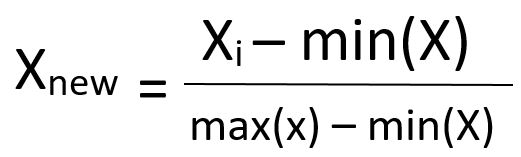







In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
#Creating Object
scaler=MinMaxScaler()

In [12]:
#fit data
fit_mar_sp=scaler.fit(x[["Marketing Spend"]])
fit_mar_sp

MinMaxScaler()

In [13]:
x["Marketing Spend"]=scaler.transform(x[["Marketing Spend"]])


In [14]:
x["Marketing Spend"].head()

0    0.692617
1    0.983359
2    0.927985
3    0.873136
4    0.859438
Name: Marketing Spend, dtype: float64

# **OR**
> **Directly Using fit_transform**



In [15]:
x["Administration"]=scaler.fit_transform(x[["Administration"]])

In [16]:
x["Administration"].head()

0    0.651744
1    0.761972
2    0.379579
3    0.512998
4    0.305328
Name: Administration, dtype: float64

# **Another Way**

In [17]:
#Select col to Normalize
col_normalize= ['Marketing Spend', 'Administration', 'Transport']

In [18]:
df[col_normalize]=scaler.fit_transform(df[col_normalize])

In [19]:
df[col_normalize].head()

,Marketing Spend,Administration,Transport
0,0.692617,0.651744,1.000000
1,0.983359,0.761972,0.940893
2,0.927985,0.379579,0.864664
3,0.873136,0.512998,0.812235
4,0.859438,0.305328,0.776136


# **for Loop**

In [20]:
x1=x.copy()

In [21]:
for column in x1.columns:
  if x1[column].dtype==object:
    continue
  else:
    scaler.fit(x1[[column]])
    x1[column]=scaler.transform(x1[[column]])
print(x1.head())

   Marketing Spend  Administration  Transport     Area
0         0.692617        0.651744   1.000000    Dhaka
1         0.983359        0.761972   0.940893      Ctg
2         0.927985        0.379579   0.864664  Rangpur
3         0.873136        0.512998   0.812235    Dhaka
4         0.859438        0.305328   0.776136  Rangpur


# **Manually**

In [22]:
#Read the Dataset
df=pd.read_csv("/content/drive/MyDrive/Data/supershops.csv")

In [23]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [24]:
#Define Function

def Normalized(orginal):
  new_value=(orginal-orginal.min())/(orginal.max()-orginal.min())
  return new_value

In [25]:
#The "Markenting Spend" Column convert Numpy array
array=df["Marketing Spend"].to_numpy()

In [26]:
a=array

In [27]:
a

array([114523.61, 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 165349.2 ,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

In [28]:
Normalized(a)

array([0.69261666, 0.98335946, 0.92798459, 0.87313643, 0.85943772,
       0.797566  , 0.81412828, 0.7880179 , 0.72901786, 0.74590551,
       0.61635061, 0.60884455, 0.56766982, 0.55635219, 0.72539353,
       1.        , 0.47180821, 0.57246821, 0.55488118, 0.52264964,
       0.46116861, 0.47408436, 0.4475048 , 0.40842369, 0.46594728,
       0.39107967, 0.45557444, 0.43609283, 0.39946683, 0.39676926,
       0.37493063, 0.36974101, 0.38348453, 0.33561668, 0.2807759 ,
       0.2782839 , 0.17335288, 0.26652654, 0.12234465, 0.23319442,
       0.17390063, 0.16869099, 0.14297577, 0.09377566, 0.13412668,
       0.0060492 , 0.00795565, 0.        , 0.00327821, 0.        ])

In [29]:
#The "Administration" Column convert Numpy array
array=df["Administration"].to_numpy()

In [30]:
b=array

In [31]:
b

array([136897.8 , 151377.59, 101145.55, 118671.85,  91391.77,  99814.71,
       147198.87, 145530.06, 148718.95, 108679.17, 110594.11,  91790.61,
       127320.38, 135495.07, 156547.42, 122616.84, 121597.55, 145077.58,
       114175.79, 153514.11, 113867.3 , 153773.43, 122782.75, 105751.03,
        99281.34, 139553.16, 144135.98, 127864.55, 182645.56, 153032.06,
       115641.28, 152701.92, 129219.61, 103057.49, 157693.92,  85047.44,
       127056.21,  51283.14,  65947.93,  82982.09, 118546.05,  84710.77,
        96189.63, 127382.3 , 154806.14, 124153.04, 115816.21, 135426.92,
        51743.15, 116983.8 ])

In [32]:
Normalized(b)

array([0.65174393, 0.76197173, 0.37957895, 0.51299839, 0.30532804,
       0.3694479 , 0.73016111, 0.71745725, 0.74173276, 0.43692884,
       0.45150637, 0.30836422, 0.57883556, 0.64106561, 0.8013272 ,
       0.54302973, 0.53527036, 0.71401273, 0.47877201, 0.77823604,
       0.47642362, 0.78021012, 0.54429273, 0.4146383 , 0.3653876 ,
       0.67195793, 0.70684477, 0.58297807, 1.        , 0.77456642,
       0.48992809, 0.77205322, 0.5932935 , 0.39413365, 0.81005496,
       0.25703165, 0.57682456, 0.        , 0.11163611, 0.24130912,
       0.51204073, 0.25446874, 0.34185188, 0.57930693, 0.78807166,
       0.5547241 , 0.49125975, 0.64054682, 0.00350184, 0.50014806])

# **Standardization**
---
Standardization is another scaling method where the values are centered around the mean with a unit standard deviation
---
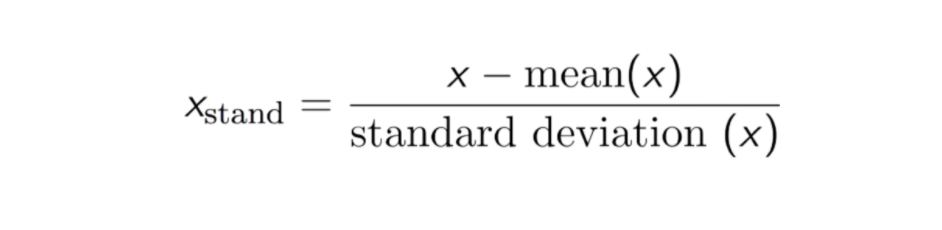


# **Import Necessary Library**

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [34]:
#Read the dataset
dataset=pd.read_csv("/content/drive/MyDrive/Data/supershops.csv")

In [35]:
dataset.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [36]:
dataFrame=dataset.copy()

In [37]:
xs=dataset.drop("Profit",axis=1)
ys=dataset["Profit"]

In [38]:
xs.head()

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,Dhaka
1,162597.70,151377.59,443898.53,Ctg
2,153441.51,101145.55,407934.54,Rangpur
3,144372.41,118671.85,383199.62,Dhaka
4,142107.34,91391.77,366168.42,Rangpur


In [39]:
ys.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [40]:
#Creating Object
scaler=StandardScaler()

In [41]:
xs['Marketing Spend']=scaler.fit_transform(xs[['Marketing Spend']])

In [42]:
xs['Marketing Spend'].head()

0    0.897913
1    1.955860
2    1.754364
3    1.554784
4    1.504937
Name: Marketing Spend, dtype: float64

# **Another Process**

In [43]:
xs_=xs.copy()

In [44]:
xs_.head()

,Marketing Spend,Administration,Transport,Area
0,0.897913,136897.80,471784.10,Dhaka
1,1.955860,151377.59,443898.53,Ctg
2,1.754364,101145.55,407934.54,Rangpur
3,1.554784,118671.85,383199.62,Dhaka
4,1.504937,91391.77,366168.42,Rangpur


In [45]:
#Select the column for standardizing
col_stand=['Marketing Spend','Administration','Transport']

In [46]:
dataset[col_stand]=scaler.fit_transform(dataset[col_stand])

In [47]:
dataset[col_stand].head()

,Marketing Spend,Administration,Transport
0,0.897913,0.560753,2.165287
1,1.955860,1.082807,1.929843
2,1.754364,-0.728257,1.626191
3,1.554784,-0.096365,1.417348
4,1.504937,-1.079919,1.273550


In [48]:
dataset.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,0.897913,0.560753,2.165287,Dhaka,192261.83
1,1.955860,1.082807,1.929843,Ctg,191792.06
2,1.754364,-0.728257,1.626191,Rangpur,191050.39
3,1.554784,-0.096365,1.417348,Dhaka,182901.99
4,1.504937,-1.079919,1.273550,Rangpur,166187.94


# **Manually**

In [49]:
#Load dataset
dataframe=pd.read_csv("/content/drive/MyDrive/Data/supershops.csv")

In [50]:
dataframe.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [51]:
xsd=dataframe.drop("Profit",axis=1)
ysd=dataframe["Profit"]

In [52]:
xsd.head()

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,Dhaka
1,162597.70,151377.59,443898.53,Ctg
2,153441.51,101145.55,407934.54,Rangpur
3,144372.41,118671.85,383199.62,Dhaka
4,142107.34,91391.77,366168.42,Rangpur


In [53]:
ysd.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [54]:
#Standard Deviation
sd=xsd["Marketing Spend"].std()

In [55]:
sd

45902.25648230753

In [56]:
#Mean Calculation
mn=xsd["Marketing Spend"].mean()

In [57]:
mn

73721.6156

In [58]:
orginal_value=dataframe["Marketing Spend"].to_numpy()

In [59]:
orginal_value

array([114523.61, 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 165349.2 ,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

In [60]:
'''
mn=mean Value
sd=standard Deviation
orginal Value
'''
new_value=(orginal_value-mn)/sd

In [61]:
new_value

array([ 0.88888864,  1.93620295,  1.73673149,  1.53915733,  1.48981182,
        1.26693738,  1.32659806,  1.23254321,  1.02001313,  1.08084587,
        0.61416293,  0.58712461,  0.43880489,  0.39803652,  1.00695756,
        1.99614554,  0.09349201,  0.45608966,  0.39273765,  0.27663312,
        0.05516601,  0.10169118,  0.00594621, -0.13483184,  0.07237976,
       -0.1973085 ,  0.03501471, -0.03516201, -0.16709626, -0.17681343,
       -0.25548059, -0.27417466, -0.22466773, -0.39709738, -0.59464496,
       -0.60362165, -0.98160437, -0.64597403, -1.16534632, -0.76604307,
       -0.97963127, -0.99839745, -1.09102884, -1.2682576 , -1.12290505,
       -1.58426603, -1.57739861, -1.60605646, -1.59424767, -1.60605646])

# **for Loop**

In [62]:
x2=x.copy()

In [63]:
for column in x2:
  if x2[column].dtype==object:
    continue
  else:
    scaler.fit(x2[[column]])
    x2[column]=scaler.transform(x2[[column]])
print(x2.head())

   Marketing Spend  Administration  Transport     Area
0         0.897913        0.560753   2.165287    Dhaka
1         1.955860        1.082807   1.929843      Ctg
2         1.754364       -0.728257   1.626191  Rangpur
3         1.554784       -0.096365   1.417348    Dhaka
4         1.504937       -1.079919   1.273550  Rangpur


# **Max Absolute Scaler**
---
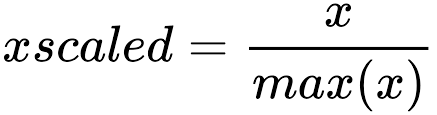


# **Import Required Library**

In [64]:
import numpy as np
import pandas as pd

In [65]:
#Read the Dataset
df_=pd.read_csv("/content/drive/MyDrive/Data/supershops.csv")

In [66]:
df_.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [67]:
from sklearn.preprocessing import MaxAbsScaler

In [68]:
scaler=MaxAbsScaler

In [69]:
x3=x.copy()